In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class PARAMS:
    SENSOR_FULL_X = 3.68 # mm
    SENSOR_FULL_Y = 2.76 # mm
    SENSOR_FULL_X_PX = 3280
    SENSOR_FULL_Y_PX = 2464

    PIXEL_SIZE = SENSOR_FULL_X/3280 # 1.12 um for IMX219
    F_PX = 1570 # focal length in pixels
    F = F_PX*PIXEL_SIZE
    B = 100  # mm (baseline)

In [3]:
# Pixel size is after 1920x1080 -> 480x270 conversion
F, B, PIXEL_SIZE = (PARAMS.F, PARAMS.B, PARAMS.PIXEL_SIZE)

In [4]:
disp_arr = np.load("../disp_arr.npy")

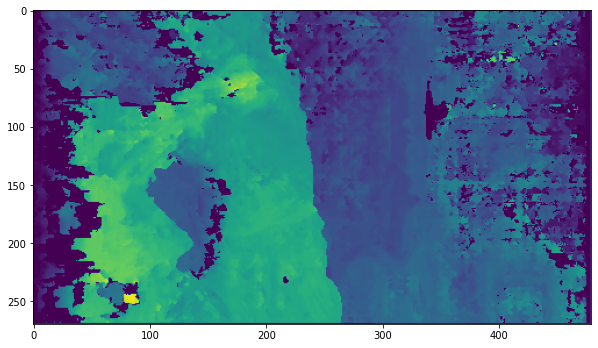

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(disp_arr)

In [6]:
def disp2depth(disp_arr):
    disp_arr[disp_arr < 10] = 10
    disp_arr_mm = disp_arr * PIXEL_SIZE # convert disparites from px -> mm
    depth_arr_mm = F * B / (disp_arr_mm + 1e-10)  # calculate depth
    return depth_arr_mm

In [7]:
depth_arr_mm = disp2depth(disp_arr)

In [8]:
depth_arr_mm[100,200]

1481.1320742262837